##Proyek Akhir : Klasifikasi Gambar






*   Nama: ADHA SYAH MAJID
*   Email: adhasyahm@gmail.com





In [21]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [25]:
import zipfile
!unzip /content/drive/MyDrive/machine_learning/rockpaperscissors.zip -d /content/tes

Archive:  /content/drive/MyDrive/machine_learning/rockpaperscissors.zip
   creating: /content/tes/rockpaperscissors/
  inflating: /content/tes/__MACOSX/._rockpaperscissors  
   creating: /content/tes/rockpaperscissors/paper/
  inflating: /content/tes/__MACOSX/rockpaperscissors/._paper  
  inflating: /content/tes/rockpaperscissors/.DS_Store  
  inflating: /content/tes/__MACOSX/rockpaperscissors/._.DS_Store  
   creating: /content/tes/rockpaperscissors/rock/
  inflating: /content/tes/__MACOSX/rockpaperscissors/._rock  
   creating: /content/tes/rockpaperscissors/scissors/
  inflating: /content/tes/__MACOSX/rockpaperscissors/._scissors  
  inflating: /content/tes/rockpaperscissors/README_rpc-cv-images.txt  
  inflating: /content/tes/__MACOSX/rockpaperscissors/._README_rpc-cv-images.txt  
  inflating: /content/tes/rockpaperscissors/paper/W79peyAyfQqNP1vF.png  
  inflating: /content/tes/__MACOSX/rockpaperscissors/paper/._W79peyAyfQqNP1vF.png  
  inflating: /content/tes/rockpaperscissors/pap

In [26]:
#instal untuk split train dan val
!pip install split-folders

In [27]:
#import img generator tf keras
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [28]:
#split
import splitfolders
splitfolders.ratio('/content/tes/rockpaperscissors', output='/content/tes/rockpaperscissors/bagi', seed=1337 ,ratio=(0.6,0.4))

Copying files: 2188 files [00:01, 1913.89 files/s]


In [29]:
# %rm -rf '/content/tes/rockpaperscissors/bagiVal'
# %rm -rf '/content/tes/rockpaperscissors/bagiTrain'
# %rm -rf '/content/tes/rockpaperscissors/bagi'

In [30]:
#import
from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__) #cek versi

2.15.0


In [31]:
os.listdir("/content/tes/rockpaperscissors/bagi") #cek isi folder rock paper scisssors

['val', 'train']

In [32]:
train_dir = os.path.join('/content/tes/rockpaperscissors/bagi', 'train')
validation_dir = os.path.join('/content/tes/rockpaperscissors/bagi', 'val')

In [33]:
#train dengan img generator
train_datagen = ImageDataGenerator(
                    validation_split=0.4,
                    rescale=1.0/255,
                    rotation_range=20,
                    vertical_flip=True,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1.0/255)

In [34]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        shuffle=True,
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=25,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        shuffle=True,
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=25,
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [ ]:
model.summary() #ringkasan

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.SGD(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=50,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=30, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/30
50/50 - 29s - loss: 0.3301 - accuracy: 0.8750 - val_loss: 0.1789 - val_accuracy: 0.9000 - 29s/epoch - 570ms/step
Epoch 2/30
50/50 - 26s - loss: 0.2659 - accuracy: 0.8950 - val_loss: 0.0846 - val_accuracy: 0.9500 - 26s/epoch - 516ms/step
Epoch 3/30
50/50 - 28s - loss: 0.3375 - accuracy: 0.8900 - val_loss: 0.1393 - val_accuracy: 0.9000 - 28s/epoch - 561ms/step
Epoch 4/30
50/50 - 26s - loss: 0.3664 - accuracy: 0.8900 - val_loss: 0.7789 - val_accuracy: 0.7000 - 26s/epoch - 517ms/step
Epoch 5/30
50/50 - 27s - loss: 0.1995 - accuracy: 0.9250 - val_loss: 0.0637 - val_accuracy: 1.0000 - 27s/epoch - 546ms/step
Epoch 6/30
50/50 - 26s - loss: 0.2835 - accuracy: 0.9000 - val_loss: 0.2835 - val_accuracy: 0.9500 - 26s/epoch - 524ms/step
Epoch 7/30
50/50 - 27s - loss: 0.2048 - accuracy: 0.9250 - val_loss: 0.2483 - val_accuracy: 0.8500 - 27s/epoch - 540ms/step
Epoch 8/30
50/50 - 26s - loss: 0.3495 - accuracy: 0.8650 - val_loss: 0.2322 - val_accuracy: 0.9500 - 26s/epoch - 522ms/step
Epoch 9/

Saving bt.jpg to bt (5).jpg
1/1 [==============================] - 0s 165ms/step
bt (5).jpg
BATU


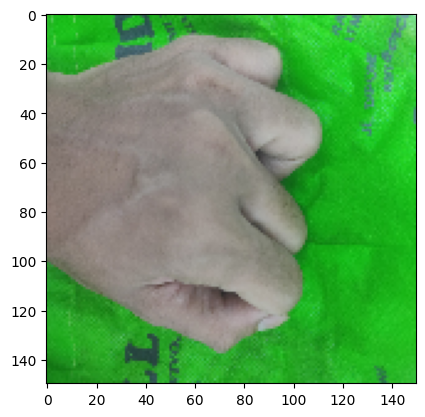

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
    print('KERTAS')
  elif output_class==1:
    print('BATU')
  else:
   print('GUNTING')

Saving gntng.jpg to gntng (2).jpg
1/1 [==============================] - 0s 67ms/step
gntng (2).jpg
GUNTING


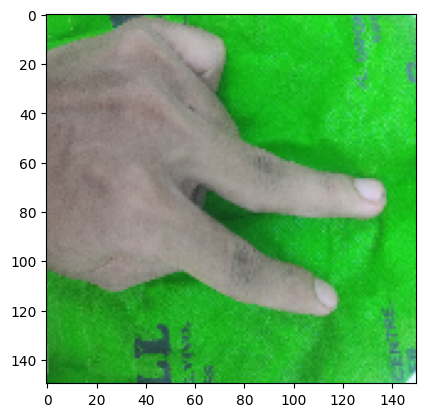

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
    print('KERTAS')
  elif output_class==1:
    print('BATU')
  else:
   print('GUNTING')

Saving krts1.jpg to krts1 (2).jpg
1/1 [==============================] - 0s 80ms/step
krts1 (2).jpg
KERTAS


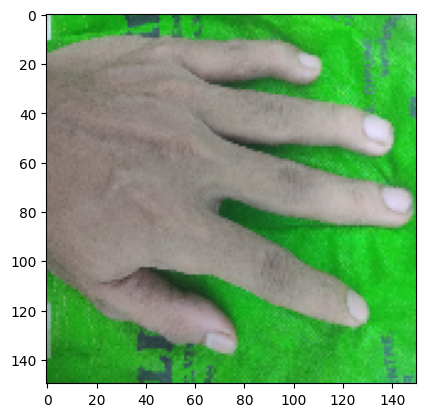

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  output_class = np.argmax(classes)
  print(fn)
  if output_class==0:
    print('KERTAS')
  elif output_class==1:
    print('BATU')
  else:
   print('GUNTING')